In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from scipy.stats import zscore, skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler


# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

In [9]:
url="https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

df_pro= pd.read_csv(url)
df_pro.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [10]:
df2=df_pro.copy()

In [11]:
print("\n1. Missing values")
missing_values= df2.isna().sum()
if missing_values.sum()>0:
    print(missing_values[missing_values>0])
else:
    print("No missing values found ")



1. Missing values
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [12]:
### Filling Missing values

In [13]:
for col in df2.select_dtypes('object'):
    df2[col].fillna(df2[col].mode()[0], inplace= True)

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_3564\3963305338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].mode()[0], inplace= True)


In [ ]:

    df2[col].fillna(df2[col].median(), inplace= True)

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_3564\2952638003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].median(), inplace= True)
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_3564\2952638003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [15]:
df2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:

print(" Duplicates rows")
duplicates= df2.duplicated().sum()
print(f" Number of duplicates is: {duplicates}")

 Duplicates rows
 Number of duplicates is: 0


In [44]:
if duplicates >0:
    print(f"Removing {duplicates} duplicates rows....")
    df4=df4.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df4.shape}")
else:
    print("✓ No duplicates to remove (as expected from EDA)")


✓ No duplicates to remove (as expected from EDA)


In [17]:
print("\n3. Skewness Analysis (EDA identified right skewed):")
skewed_vars= ['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Credit_History']
for var in skewed_vars:
    if var in df2.columns:
        skewness= skew(df2[var])
        print(f"{var}: skewness={skewness:.3f} ({'right skewed' if skewness>0.5 else 'approximately normal'})")


3. Skewness Analysis (EDA identified right skewed):
ApplicantIncome: skewness=6.524 (right skewed)
CoapplicantIncome: skewness=7.473 (right skewed)
LoanAmount: skewness=2.736 (right skewed)
Credit_History: skewness=-2.017 (approximately normal)


In [18]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df3=df2.copy()

In [20]:
df3['Gender']= df3['Gender'].replace({"Male": 1, "Female" : 0})
df3['Married']= df3['Married'].replace({"Yes": 1, "No" : 0})
df3['Self_Employed']= df3['Self_Employed'].replace({"Yes": 1, "No" : 0})
df3['Loan_Status'] = df3['Loan_Status'].replace({"Y": 1, "N" : 0})


C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_3564\1367451527.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Gender']= df3['Gender'].replace({"Male": 1, "Female" : 0})
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_3564\1367451527.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Married']= df3['Married'].replace({"Yes": 1, "No" : 0})
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_3564\1367451527.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future

In [23]:

feature_col = ['Property_Area','Education', 'Dependents','Loan_Amount_Term']
le = LabelEncoder()
for col in feature_col:
    df3[col] = le.fit_transform(df3[col])
    # df6[col] = le.fit_transform(df6[col])

In [26]:
df3['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
8    526
5     44
9     15
7     13
3      4
6      4
4      3
2      2
1      2
0      1
Name: count, dtype: int64

In [35]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1


In [39]:
### Handling OUtlier Using capping
print("=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===")
numerical_cols = df3.select_dtypes(include=[np.number]).columns.tolist()
if 'Loan_status' in numerical_cols:
    numerical_cols.remove('Loan_status')

print(f"Treeting Outliers in {len(numerical_cols)} numerical features....")
outlier_capped= 0
for col in numerical_cols:
    q1= df3[col].quantile(0.25)
    q3= df3[col].quantile(0.75)
    IQR= q3-q1
    lower_bound= q1- 1.5* IQR
    upper_bound= q3 + 1.5* IQR


outlier_before= ((df3[col] < lower_bound) | (df3[col] > upper_bound)).sum()

if  outlier_before > 0:
    df3[col]= np.where(df3[col]< lower_bound, lower_bound, df3[col]) 
    df3[col]=np.where(df3[col]>upper_bound, upper_bound, df3[col])    
    outlier_capped += outlier_before
    print(f"✓ {col}: Capped {outlier_before} outliers")
                                                                  
print(f"\nTotal outliers capped: {outlier_capped}")
print(f"Dataset shape after outlier treatment: {df3.shape}")


=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===
Treeting Outliers in 12 numerical features....

Total outliers capped: 0
Dataset shape after outlier treatment: (614, 13)


In [40]:
df16=df3.copy()


In [46]:
df3.drop(columns=['Loan_ID'], inplace=True)

In [47]:
print("\n4. Correlation with Quality (EDA Evidence):")
correlations = df3.corr()['Loan_Status'].sort_values(key=abs, ascending=False)
print("High-signal features (|correlation| > 0.2):")
high_signal = correlations[abs(correlations) > 0.2].drop('Loan_Status')
for feature, corr in high_signal.items():
    print(f"  {feature}: {corr:.3f}")

print("\nLow-signal features (|correlation| < 0.1):")
low_signal = correlations[abs(correlations) < 0.1]
for feature, corr in low_signal.items():
    print(f"  {feature}: {corr:.3f}")


4. Correlation with Quality (EDA Evidence):
High-signal features (|correlation| > 0.2):
  Credit_History: 0.541

Low-signal features (|correlation| < 0.1):
  Married: 0.091
  Education: -0.086
  CoapplicantIncome: -0.059
  LoanAmount: -0.033
  Property_Area: 0.032
  Gender: 0.018
  Dependents: 0.010
  Loan_Amount_Term: -0.006
  ApplicantIncome: -0.005
  Self_Employed: -0.004


In [50]:
print("=== LOG-TRANSFORMING SKEWED VARIABLES ===")
print("To handle right skewed columns use recommended log transformation")
skewed_vars = df3.select_dtypes(include=[np.number]).columns.tolist()
if 'Loan_status' in numerical_cols:
    skewed_vars.remove('Loan_status')
skewed_vars= ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
for var in skewed_vars:
    min_val= df3[var].min()
    if min_val <= 0:
         df3[f"{var}_log"]= np.log1p(df3[var])
         print(f"✓ {var}: Applied log1p transformation (had {min_val:.3f} minimum value)")
    else:
         df3[f"{var}_log"]= np.log(df3[var])
         print(f" {var}: Applied for log transformation")

    
    original_skew= skew(df3[var])
    transformed_skew= skew( df3[f"{var}_log"])
    print(f" Original skewness: {original_skew:.3f}>> Transformed skewness {transformed_skew:.3f}")
print(f"\n Dataset shape after log transformation: {df3.shape}")
print("New log-transformed:", [col for col in df3.columns if '_log' in col])

=== LOG-TRANSFORMING SKEWED VARIABLES ===
To handle right skewed columns use recommended log transformation
 ApplicantIncome: Applied for log transformation
 Original skewness: 6.524>> Transformed skewness 0.478
✓ CoapplicantIncome: Applied log1p transformation (had 0.000 minimum value)
 Original skewness: 7.473>> Transformed skewness -0.173
 LoanAmount: Applied for log transformation
 Original skewness: 2.736>> Transformed skewness -0.195

 Dataset shape after log transformation: (614, 15)
New log-transformed: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']


In [53]:
df3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

### Feature Engineering

In [57]:
print("1. Creating acidity ration features")

df3['Total_income']=df3['ApplicantIncome'] + df3['CoapplicantIncome']
df3['Loan_income_ratio']= df3['LoanAmount'] / df3 ['Total_income']
df3['Income_per_dependents']= df3['Total_income']/ (df3['Dependents'] + 1)

print(f"\n Dataset shape after feature engineering: {df3.shape} ")
print(f"New engineered features: {[col for col in df3 if col  not in df2.columns]}")

1. Creating acidity ration features

 Dataset shape after feature engineering: (614, 18) 
New engineered features: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Total_income', 'Loan_income_ratio', 'Income_per_dependents']


In [59]:
df3.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_income,Loan_income_ratio,Income_per_dependents
0,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1,8.674026,0.000000,4.852030,5849.0,0.021884,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0,8.430109,7.319202,4.852030,6091.0,0.021015,3045.5
2,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1,8.006368,0.000000,4.189655,3000.0,0.022000,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1,7.856707,7.765993,4.787492,4941.0,0.024287,4941.0
4,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1,8.699515,0.000000,4.948760,6000.0,0.023500,6000.0


In [ ]:
df4=df3.copy()
df4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_income,Loan_income_ratio,Income_per_dependents
0,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1,8.674026,0.000000,4.852030,5849.0,0.021884,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0,8.430109,7.319202,4.852030,6091.0,0.021015,3045.5
2,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1,8.006368,0.000000,4.189655,3000.0,0.022000,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1,7.856707,7.765993,4.787492,4941.0,0.024287,4941.0
4,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1,8.699515,0.000000,4.948760,6000.0,0.023500,6000.0


In [74]:
df4.shape

(614, 18)

### Feature selection

In [96]:
print("=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===")
df3
x= df4.drop('Loan_Status', axis=1)
y=df4['Loan_Status']

high_signal_features= ['Credit_History']
print(f"\n EDA- identified high signal features: {high_signal_features}")

low_signal_features= ['Gender', 'Married', 'Dependents','Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area'] 
print(f"\n EDA- identified low signal features: {low_signal_features}")

available_high_signal=[f for f in high_signal_features if f in x.columns]
available_low_signal= [f for f in low_signal_features if f in x.columns]

print(f"\nAvailable high-signal features: {available_high_signal}")
print(f"Available low-signal features: {available_low_signal}")
## set for evaluation

features_exclude_low_signal = [col for col in x.columns if col not in low_signal_features]
print(f"Set 1 - Exclude low-signal features: {len(features_exclude_low_signal)} features")

high_signal_plus_engineered= available_high_signal + [col for col in x.columns if any(keyword in col.lower() for keyword in ['ratio', 'interaction', 'balance', 'total', 'log','income_'])]
print(f"Set 2 - High-signal + engineered: {len(high_signal_plus_engineered)} features")

all_features = list(x.columns)
print(f"Set 3 - All features: {len(all_features)} features")

selected_features = high_signal_plus_engineered
print(f"\n✓ Selected feature set: {len(selected_features)} features")
print("Selected features:", selected_features)


=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===

 EDA- identified high signal features: ['Credit_History']

 EDA- identified low signal features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']

Available high-signal features: ['Credit_History']
Available low-signal features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']
Set 1 - Exclude low-signal features: 7 features
Set 2 - High-signal + engineered: 7 features
Set 3 - All features: 17 features

✓ Selected feature set: 7 features
Selected features: ['Credit_History', 'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Total_income', 'Loan_income_ratio', 'Income_per_dependents']


In [103]:
print("=== FEATURE SCALING (STANDARD SCALER) ===")
print("EDA recommended StandardScaler for distance-based models")

x_selected= x[selected_features]
print(f"selected feature shape: {x_selected.shape}")

# First split: 80% train+val, 20% test


x_temp, x_test, y_temp, y_test = train_test_split(
    x_selected, y, test_size=0.2, random_state=42, stratify=y)

x_train, x_val, y_train, y_val= train_test_split(x_temp, y_temp, test_size= 0.25, random_state= 42,stratify=y_temp)

print(f"\n Data split results: ")
print(f"Training sets: {x_train.shape}")
print(f"Validation sets: {x_val.shape}")
print(f"Test set: {x_test.shape}) ({(x_test.shape[0]/ len(x_selected))*100:.1f}%)")






#to check class distribution
print(f"\nClass distribution verification:")
print("Training set quality distribution:")
print(y_train.value_counts().sort_index())
print("\nValidation set quality distribution:")
print(y_val.value_counts().sort_index())
print("\nTest set quality distribution:")
print(y_test.value_counts().sort_index())


=== FEATURE SCALING (STANDARD SCALER) ===
EDA recommended StandardScaler for distance-based models
selected feature shape: (614, 7)

 Data split results: 
Training sets: (368, 7)
Validation sets: (123, 7)
Test set: (123, 7)) (20.0%)

Class distribution verification:
Training set quality distribution:
Loan_Status
0    115
1    253
Name: count, dtype: int64

Validation set quality distribution:
Loan_Status
0    39
1    84
Name: count, dtype: int64

Test set quality distribution:
Loan_Status
0    38
1    85
Name: count, dtype: int64


### Feature scaling

In [110]:
print("=== FEATURE SCALING (STANDARD SCALER) ===")
print("EDA recommended StandardScaler for distance-based models")

scaler = StandardScaler()
x_train_sampled = scaler.fit_transform(x_train)
x_train_sampled = pd.DataFrame(x_train_sampled, columns=x_train.columns)

# Transform validation and test sets
x_val_scaled = scaler.transform(x_val)
x_val_scaled = pd.DataFrame(x_val_scaled, columns=x_val.columns)

x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

print("✓ Scaling applied successfully!")
print(f"Training set scaled - Mean: {x_train_scaled.mean().mean():.4f}, Std: {x_train_scaled.std().mean():.4f}")
print(f"Validation set scaled - Mean: {x_val_scaled.mean().mean():.4f}, Std: {x_val_scaled.std().mean():.4f}")
print(f"Test set scaled - Mean: {x_test_scaled.mean().mean():.4f}, Std: {x_test_scaled.std().mean():.4f}")




=== FEATURE SCALING (STANDARD SCALER) ===
EDA recommended StandardScaler for distance-based models
✓ Scaling applied successfully!
Training set scaled - Mean: -0.0340, Std: 0.9873
Validation set scaled - Mean: -0.0373, Std: 0.8612
Test set scaled - Mean: -0.0197, Std: 1.0371


### SmOTE scaling

In [115]:
smote = SMOTE(random_state=42)
x_train_scaled, y_train_scaled= smote.fit_resample(x_train_sampled, y_train)

print("✓ SMOTE applied successfully!")
print(f"Original training samples: {len(y_train)}")
print(f"Resampled training samples: {len(y_train_scaled)}")
print("Class distribution after SMOTE:")
print(y_train_scaled.value_counts())

# --- Optional: Check scaling stats ---
print(f"Scaled Train Mean: {x_train_scaled.mean().mean():.4f}, Std: {x_train_scaled.std().mean():.4f}")

✓ SMOTE applied successfully!
Original training samples: 368
Resampled training samples: 506
Class distribution after SMOTE:
Loan_Status
0    253
1    253
Name: count, dtype: int64
Scaled Train Mean: -0.0340, Std: 0.9831


Top 10 features by correlation with loan status:
 1. Credit_History: 0.453
 2. CoapplicantIncome_log: 0.060
 3. Loan_income_ratio: 0.057
 4. ApplicantIncome_log: 0.026
 5. Income_per_dependents: 0.015
 6. Total_income: 0.015
 7. LoanAmount_log: 0.005

Engineered features in top 10: ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Total_income', 'Loan_income_ratio', 'Income_per_dependents']


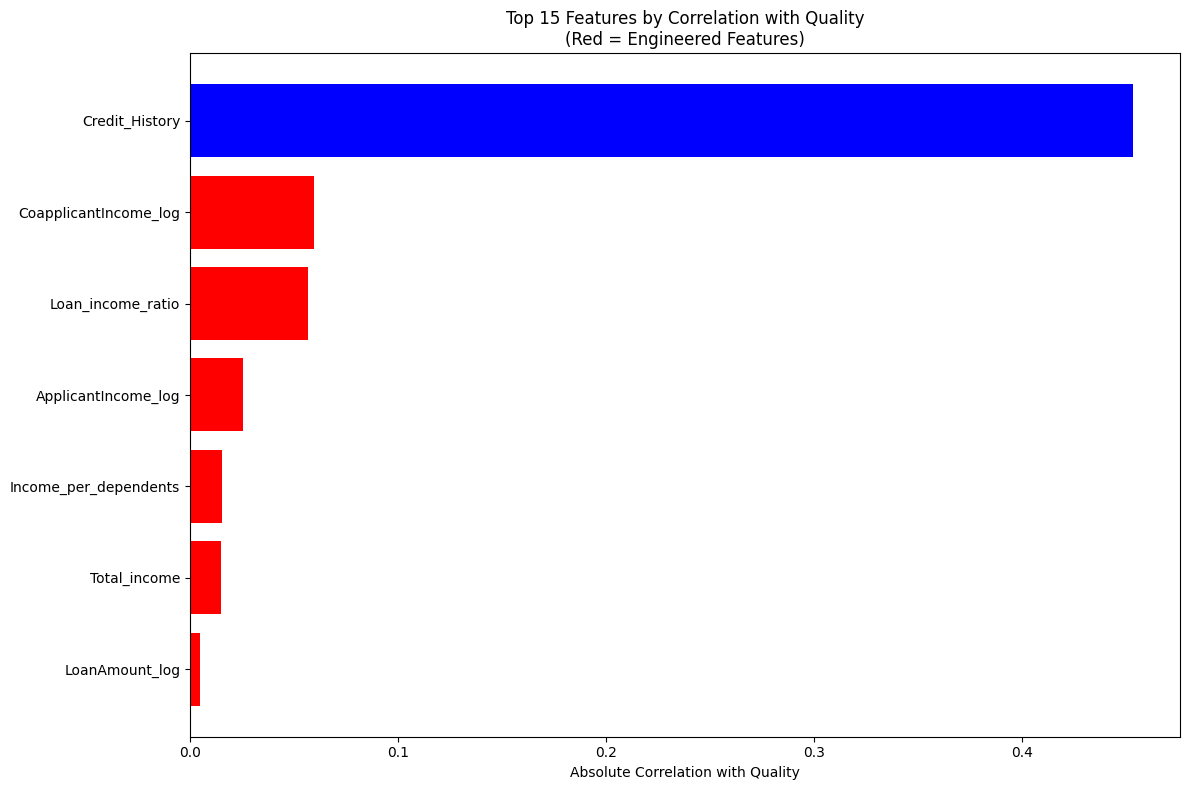


✓ Feature importance analysis completed
✓ 6 engineered features in top 10


In [116]:
### Feature importance analysis

# Calculate correlation with target for all features
feature_correlations = x_train_scaled.corrwith(y_train_scaled).abs().sort_values(ascending=False)

print("Top 10 features by correlation with loan status:")
for i, (feature, corr) in enumerate(feature_correlations.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {corr:.3f}")

# Check if engineered features are among top features
engineered_features = [col for col in x_train_scaled.columns if any(keyword in col.lower() for keyword in ['ratio', 'interaction', 'balance', 'total', 'log','income_'])]
print(f"\nEngineered features in top 10: {[f for f in engineered_features if f in feature_correlations.head(10).index]}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_correlations.head(15)
colors = ['red' if any(keyword in f.lower() for keyword in ['ratio', 'interaction', 'balance', 'total', 'log','income_']) else 'blue' for f in top_features.index]

plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Absolute Correlation with Quality')
plt.title('Top 15 Features by Correlation with Quality\n(Red = Engineered Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print(f"\n✓ Feature importance analysis completed")
print(f"✓ {len([f for f in engineered_features if f in feature_correlations.head(10).index])} engineered features in top 10")


#### Preprocessing saving

In [118]:
# Save scaled datasets
x_train_scaled.to_csv('x_train_scaled.csv', index=False)
x_val_scaled.to_csv('x_val_scaled.csv', index=False)
x_test_scaled.to_csv('x_test_scaled.csv', index=False)

# Save target variables
y_train_scaled.to_csv('y_train_scaled.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save preprocessing objects
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

# Save feature importance
feature_importance_df = pd.DataFrame({
    'feature': feature_correlations.index,
    'correlation': feature_correlations.values
})
feature_importance_df.to_csv('feature_importance.csv', index=False)


# Save preprocessing summary
preprocessing_summary = {
    'original_shape': df2.shape,
    'final_shape': df4.shape,
    'selected_features': selected_features,
    'engineered_features': engineered_features,
    'train_samples': x_train_scaled.shape[0],
    'val_samples': x_val_scaled.shape[0],
    'test_samples': x_test_scaled.shape[0],
    'scaling_method': 'StandardScaler',
    'outlier_treatment': 'IQR_capping',
    'log_transformed': ['Applicantincome', 'coapplicantincome','LoanAmount']
}


import json
with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=2)

print("- Preprocessed data saved successfully!")
print("\nFiles created:")
print("- X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv")
print("- y_train.csv, y_val.csv, y_test.csv")
print("- scaler.pkl, selected_features.pkl")
print("- feature_importance.csv, preprocessing_summary.json")


- Preprocessed data saved successfully!

Files created:
- X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv
- y_train.csv, y_val.csv, y_test.csv
- scaler.pkl, selected_features.pkl
- feature_importance.csv, preprocessing_summary.json
